# Generate Simulated Data: Random-Plaintext-Dataset-7

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44
fieldMasked3 = 20

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
mask3 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))
    mask3.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5],'\nmask3',mask2[0:5])

plaintext: [108, 158, 31, 138, 18] 
mask [5, 64, 64, 196, 43] 
mask2 [218, 190, 113, 246, 128] 
mask3 [218, 190, 113, 246, 128]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [-9.201417429817301, 7.449026673561824, -2.0026480449353716, -1.527983238744536, -0.03265493204142356] 
labels: [2, 5, 2, 5, 5]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskedNoise3 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise3.append((bin(mask3[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5],"\nmaskedNoise2:",maskedNoise3[0:5])

maskedData: [7.152612750478119, 3.8526405136706323, 6.695713004855118, -0.9377020875130997, 11.166916818224326] 
maskedNoise: [5.69258983309628, 2.3660190331088105, -3.7091864222046977, 0.9445889400783316, 4.301805752167198] 
maskedNoise2: [8.651442108470876, 6.642004659186026, 2.022698495443215, 12.808175422286979, 4.63531585206996] 
maskedNoise2: [7.243920086394638, 3.1797373979185943, -1.7768931836019854, 10.706502403301219, 0.21625515367071424]


In [13]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked3:
            rawData.append(maskedNoise3[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [2.4113096625634953, 3.6634875447373534, 2.954044429222766, -1.3288275664196503, 5.69258983309628, -0.9829812186446283, 7.206799912023541, -5.508312333017841, 12.782643460005971, 4.191486044439305, 0.8610312490618126, 7.8466781017454235, -3.4055167717504107, -0.05021213636106925, 11.055137723742412, 4.638173216970424, 1.3606857635715661, 4.069666805435558, 3.3714202614849316, 5.38781868835529, 7.243920086394638, 1.5163926721038328, 7.420074632804413, 6.238936379324032, 7.152612750478119, 1.8397990457107576, 6.08682506272798, 0.08390085290224647, 3.2597107733425554, 7.745190087589224, -3.9964238939942947, 4.6651927469395655, 12.354477640539763, -0.6782064210682264, 5.983774732623231, -1.3072480863334253, 7.381796065292773, 0.4571228453420981, 1.7553929341969798, 6.357415435183312, 7.118264334083134, 8.810101645731557, -2.5360064920059457, 0.8957547909296517, 8.651442108470876, -1.8712910439453445, 0.4409306462816336, 5.674109217798667, 4.158760021413913, 3.79677

In [14]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

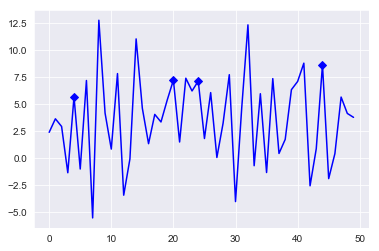

In [15]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

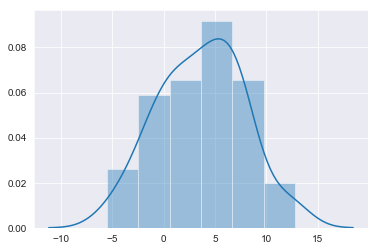

In [16]:
sns.distplot(rawTraces[0])

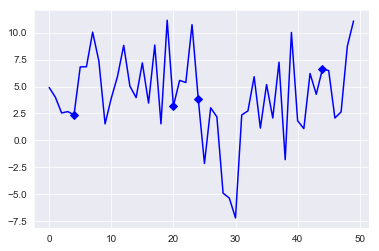

In [17]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

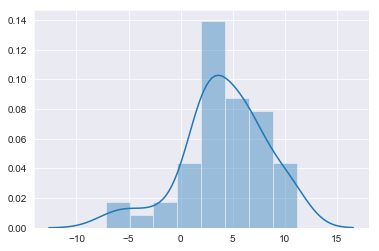

In [18]:
sns.distplot(rawTraces[1])

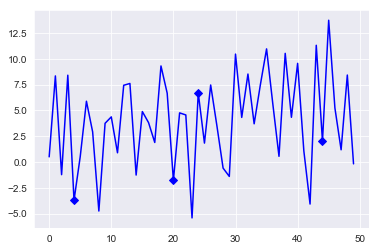

In [19]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

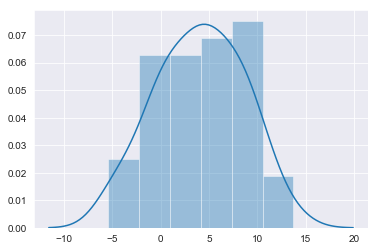

In [20]:
sns.distplot(rawTraces[2])

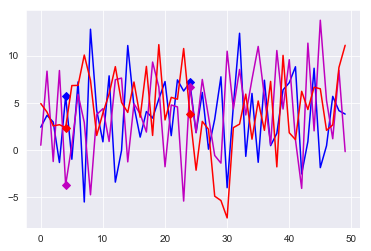

In [21]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[fieldMaskedLekage,fieldMasked])

### Data Path

In [22]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [23]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.025s

OK


In [24]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,2.411310,3.663488,2.954044,-1.328828,5.692590,-0.982981,7.206800,-5.508312,12.782643,4.191486,...,8.810102,-2.536006,0.895755,8.651442,-1.871291,0.440931,5.674109,4.158760,3.796779,108
1,4.907107,4.008802,2.545793,2.672461,2.366019,6.817069,6.835723,10.048755,7.365376,1.531955,...,1.093192,6.207683,4.278506,6.642005,6.476676,2.076909,2.646305,8.734011,11.081080,158
2,0.501372,8.341073,-1.223406,8.409296,-3.709186,0.521351,5.888482,2.915871,-4.745262,3.750751,...,1.077206,-4.069662,11.307839,2.022698,13.733282,5.238409,1.186967,8.425171,-0.176696,31
3,5.158193,1.869509,8.560069,8.670671,0.944589,-0.669598,0.705768,9.100451,17.754118,11.546117,...,13.293088,6.157285,2.937635,12.808175,10.074447,11.166356,-3.953848,9.997360,3.990399,138
4,1.920232,8.339621,-1.267998,3.099858,4.301806,4.163903,1.575341,-9.662897,3.993898,5.128706,...,10.352509,5.956091,7.290997,4.635316,-2.849086,11.593942,-0.468857,9.069011,-2.473864,18


### Write Data 

In [25]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS7.csv',index=False)